# Analyzing User Satisfaction and Perceived Difficulty Across Languages in Duolingo Reviews

### *How do user sentiments and perceptions of learning difficulty vary across different languages offered on Duolingo*?
In this project, I want to investigate the user sentiments and perceived learning difficulty across different languages on Duolingo. I will use the following steps to conduct my analysis:<br>
<ol><li><b>Import Packages</b>: Import needed packages into the Notebook<br></li>
<li><b>Prepare the Data</b>: Scrap data from app store and clean it to a csv file, then import in Notebook as a dataframe<br></li>
<li><b>Detect the Language</b>: Detect the corresponding language for each review using keyword detection<br></li>
<li><b>Random Selection</b>: Random selecting reviews from the dataframe to make sure every language has similar amount of review to compare<br></li>
<li><b>Sentiment Analysis</b>: Do a sentiment analysis using TextBlob module, assign score to each review<br></li>
<li><b>Analyzing Learning Difficulty</b>: Analyzing learning difficulty by use keyword detection, assign score to each review<br></li>
<li><b>Compare and Visualize</b>: compare the result between languages and visualize the result<br></li>
<li><b>Summary and Conclusion</b>: conclude and summarize the finding and analysis<br></li>

## Step 1: Import Packages
In this project, I used two other packages apart from pandas and numpy, which are <br> 
<li><b>app_store_scraper</b> to review from AppStore <a href="https://www.freecodecamp.org/news/how-to-use-python-to-scrape-app-store-reviews/">[Source]</a></li>
<li><b>TextBlob</b> to do sentiment analysis. <a href="https://textblob.readthedocs.io/en/dev/">[Source]</a> <br><br> </li>
So I install the modules and import them into this Notebook. 

In [ ]:
pip install app-store-scraper

In [ ]:
pip install textblob

In [175]:
import pandas as pd
import numpy as np 
import json
from textblob import TextBlob
from app_store_scraper import AppStore

## Step 2: Prepare the Data
Then, I use the app_store_scraper to scrap <b>3660 reviews</b> of Duolingo from App Store following the <a href="https://www.freecodecamp.org/news/how-to-use-python-to-scrape-app-store-reviews/">guide</a>. <br><br>
After the data loaded, I put them in a data frame, get the columns that I want, and put it into a csv file. This step is to make sure the data will be consistent throughout the project, which means I can always get the same result when I run the code.

In [ ]:
# Loaded 3600 reviews
duolingo = AppStore(country='us', app_name='duolingo', app_id='570060128', log_interval=5)
duolingo.review(how_many=3600)

In [ ]:
# Clean and organize the data into a csv file
duolingo_df = pd.DataFrame(np.array(duolingo.reviews),columns=['review'])
duolingo_df = duolingo_df.join(pd.DataFrame(duolingo_df.pop('review').tolist()))
duolingo_df = duolingo_df.get(['userName','date','review','rating'])
duolingo_df.to_csv('Duolingo-app-reviews.csv')

Then, I import the Duolingo reviews dataset into the Notebook.

In [19]:
# Import review dataset into Notebook
reviews_df = pd.read_csv('Duolingo-app-reviews.csv').get(['userName', 'date', 'review', 'rating'])
reviews_df

,userName,date,review,rating
0,LL Bear,2021-05-18 13:38:21,This app is truly fun and is a great supplemen...,5
1,fkdiifjxkdidksock,2023-12-18 10:14:16,I love Duolingo I think it’s a really fun way ...,4
2,Darth sean,2023-01-16 23:36:52,"As usual, “upgrades” to computer products dest...",4
3,jacqueburrow,2023-04-03 03:40:12,I love this app and I am learning a lot. I’m t...,5
4,keep uinin.k7grrhyh,2023-10-11 00:15:59,"So this game is good no, I really like it but ...",5
...,...,...,...,...
3655,acrisis,2024-02-01 12:47:11,"I am still new to Duo Lingo, I love snacking o...",3
3656,mEGGOwaffle,2024-02-01 04:05:10,This app is fantastic. It has helped me tremen...,4
3657,EmJay941,2024-01-29 16:08:34,"I’ve only just started, and finished the first...",4
3658,diesubway,2024-01-24 03:07:10,I think that this is a wonderful idea but it’s...,3


## Step 3: Detect the Language
Since I want to compare reviews across different languages, I created a function <i>detect_language</i> to detect the language that each review is referring to. The function adds a column to the original dataframe showing the detected language.<br><br>
<b> I only use 5 languages in this project, and they are the 5 most popular languages of Duolingo in 2023 <a href="https://blog.duolingo.com/2023-duolingo-language-report/">[Source]</a>. (I didn't include English because the reviews are from US store, and many of the English comments are from English speaker.)

In [76]:
def detect_language(review):
    # Common words or phrases associated with each language
    languages = {'spanish': ['español', 'spanish', 'españa'],
                 'french': ['français', 'french', 'france'],
                 'german': ['deutsch', 'german', 'germany'],
                 'japanese': ['日本語', 'japanese', 'japan'],
                 'korean': ['한국어', 'korean', 'korea'],
                }
    
    review_lower = review.lower()  # Convert review text to lowercase for case-insensitive comparison
    
    # Check if any common word or phrase associated with each language is present in the review
    detected_lan =[]
    for language, keywords in languages.items():
        for keyword in keywords:
            if keyword in review_lower:
                return language
    
    return 'unknown'  # Return 'unknown' if no language is detected

# Add a new column 'detected_language' to the DataFrame containing the detected language for each review
reviews_df['detected_language'] = reviews_df['review'].apply(detect_language)

#remove "unknown" review
reviews_df = reviews_df[reviews_df.get('detected_language')!='unknown'] 

In [77]:
# See the review distribution between languages
reviews_df.groupby('detected_language').count().get(['userName'])

,userName
detected_language,
french,337
german,154
japanese,216
korean,51
spanish,1091


## Step 4: Random Selection
From the table above, I noticed there's a huge difference in the number of reviews for different languages. To avoid the bias from the data, I randomly selected (with replacement) 100 reviews of each language, and form a new dataframe <i>balanced_review_df</i>.

In [78]:
# Define the desired number of reviews for each language
desired_reviews_per_language = 100

# Initialize an empty list to store the balanced dataset
balanced_reviews = []

# Loop through each language
for language in reviews_df['detected_language'].unique():
    # Filter reviews for the current language
    language_reviews = reviews_df[reviews_df['detected_language'] == language]
    
    # Randomly select the desired number of reviews for the current language
    sampled_reviews = language_reviews.sample(desired_reviews_per_language, replace=True, random_state=42)
    
    # Append the sampled reviews to the balanced dataset list
    balanced_reviews.extend(sampled_reviews.values.tolist())

# Create a DataFrame from the list of balanced reviews
balanced_reviews_df = pd.DataFrame(balanced_reviews, columns=reviews_df.columns)

# Check the number of reviews for each language in the balanced dataset
balanced_reviews_df['detected_language'].value_counts()

detected_language
french      100
spanish     100
german      100
japanese    100
korean      100
Name: count, dtype: int64

## Step 5: Sentiment Analysis
Then, I used TextBlob sentiment analysis module to calculate sentiment scores for each review, and add the result as a column to the dataframe.

In [79]:
# Calculate the sentiment scores for each review and add the result as a column to the dataframe.
balanced_reviews_df['sentiment_score'] = balanced_reviews_df['review'].\
apply(lambda x: TextBlob(x).sentiment.polarity)

In [98]:
# Language Comparison
# Group the reviews by the detected language
balanced_reviews_df.get(['detected_language', 'sentiment_score','rating']).\
groupby('detected_language').mean().sort_values('sentiment_score')

,sentiment_score,rating
detected_language,,
japanese,0.115433,3.61
korean,0.120590,3.32
spanish,0.124027,3.76
german,0.126135,3.47
french,0.161188,3.67


## Step 6: Analyzing Learning Difficulty
Next, I analyzing the learning difficulty for different languages by detecting keywords. 
<li>Firstly, I define a list of keywords that's related to learning difficulty.
<li>Then, I count the occurrence of difficulty keywords in each review.
<li>Lastly, I calculate the percentage of reviews mentioning difficulty keywords for each language, and add the value to the dataframe.

In [172]:
# Define difficulty keywords
difficulty_keywords = ['hard', 'difficult', 'struggle', 'challenging']

# Function to check if any difficulty keyword is present in the review text
def detect_difficulty(text):
    for keyword in difficulty_keywords:
        if keyword in text.lower():
            return 1
    return 0

# Apply the function to create a new column indicating if any difficulty keyword was detected
balanced_reviews_df['difficulty_detected'] = balanced_reviews_df['review'].apply(detect_difficulty)

# Calculate the percentage of reviews mentioning difficulty keywords for each language
difficulty_percentage_by_language = balanced_reviews_df.groupby('detected_language')\
['difficulty_detected'].mean() * 100
difficulty_percentage_by_language.sort_values()

detected_language
spanish     21.0
german      23.0
korean      26.0
french      27.0
japanese    29.0
Name: difficulty_detected, dtype: float64

## Step 7: Compare and Visualize
At the end of the analysis, I compared the different languages based on three different scores: sentiment score, difficulty detected, and rating.  

In [158]:
# adjust rating to be close to other factors
balanced_reviews_df['adjusted_rating'] = balanced_reviews_df.get('rating')/10

detected_language,spanish,german,korean,french,japanese
sentiment_score,0.124027,0.126135,0.12059,0.161188,0.115433
difficulty_detected,0.210000,0.230000,0.26000,0.270000,0.290000
adjusted_rating,0.376000,0.347000,0.33200,0.367000,0.361000


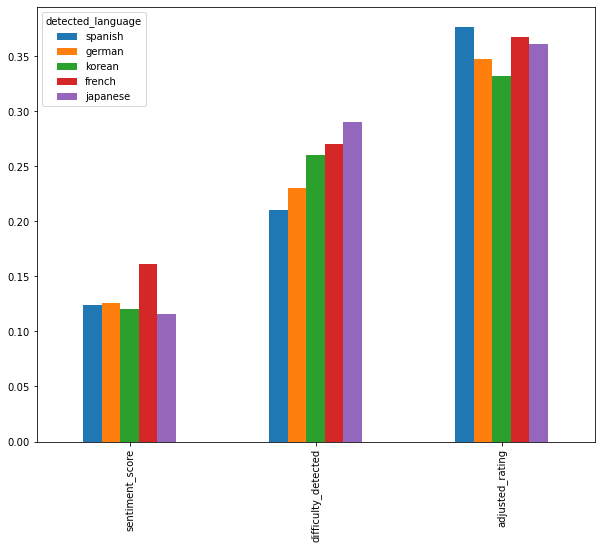

In [169]:
# Language Comparison
# Group the reviews by the detected language
num_comparison = balanced_reviews_df.get(['detected_language', 'sentiment_score','difficulty_detected', 
                                          'adjusted_rating']).groupby('detected_language').mean() \
                                            .sort_values('difficulty_detected')
# transporse the dataframe
num_comparison_transposed = num_comparison.transpose()

# Plotting
num_comparison_transposed.plot(kind='bar', figsize=(10, 8));
num_comparison_transposed

## Step 8: Summary and Conclusion
### 1. Sentiment Score Analysis:<br>
<li> Spanish has the highest sentiment score (0.124), followed closely by German (0.126).
<li> Japanese has the lowest sentiment score (0.115), indicating slightly less positive user sentiment compared to other languages. </li>
    
### 2. Perceived Difficulty Analysis: <br>
<li> Spanish has the lowest perceived difficulty level (0.21), followed by German (0.23) and Korean (0.26).
<li> Japanese has the highest perceived difficulty level (0.29), indicating that users may find it relatively more challenging to learn Japanese on Duolingo compared to other languages.</li>

### 3. Overall Analysis:
I observe that Japanese appears to be the language associated with the lowest satisfaction level and the highest perceived difficulty among Duolingo users. Conversely, Spanish and French exhibit higher satisfaction levels and lower perceived difficulty among Duolingo users. This differences could resulted from factors such as the familiarity of Western users with Western languages compared to Eastern languages like Japanese. It could also indicate potential areas for improvement in Duolingo's teaching methods for Japanese, or other Eastern languages.

### Conclusion
Therefore, the analysis suggests that user satisfaction and perceived difficulty levels vary across different languages on Duolingo, which could be influenced by factors such as language familiarity and teaching effectiveness. 